# Imports

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
from pandas_profiling import ProfileReport

In [3]:
#specify data directory
root = Path('creditone-project', 'data')
# this method for specifying relative paths didn't work for me, problem might be "data science stuff" directory

In [4]:
#import cleaned data 
df = pd.read_csv('cleaned_transformed_credit_one_data.csv')

In [5]:
#verify imported data looks as expected
df.head()

,ID,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_ap,bill_m,bill_ju,bill_jy,...,pmt_jy,pmt_ag,pmt_s,pay_ap,pay_m,pay_ju,pay_jy,pay_ag,pay_s,DEFAULT
0,1,female,university,1,24,20000,0,0,0,689,...,0,689,0,-2,-2,-1,-1,2,2,default
1,2,female,university,2,26,120000,3261,3455,3272,2682,...,1000,1000,0,2,0,0,0,2,-1,default
2,3,female,university,2,34,90000,15549,14948,14331,13559,...,1000,1500,1518,0,0,0,0,0,0,not default
3,4,female,university,1,37,50000,29547,28959,28314,49291,...,1200,2019,2000,0,0,0,0,0,0,not default
4,5,male,university,1,57,50000,19131,19146,20940,35835,...,10000,36681,2000,0,0,0,-1,0,-1,not default


# The Data

## Raw Data Info
* Location: raw data is stored in the MySQL database.
* After a SQL query, I downloaded the raw data .csv file, cleaned it in a jupyter notebook (c2t1-kp-creditone-processing.ipynb), and exprted the cleaned data as .csv file ('cleaned_transformed_credit_one_data.csv'). 
* I imported the cleaned data file into this eda notebook for initial exploration.

* Cleaned data characteristics: 30,000 obervations & 25 variables

## Variable dtypes

In [6]:
#get variable data types
df.dtypes

ID            int64
SEX          object
EDUCATION    object
MARRIAGE      int64
AGE           int64
LIMIT_BAL     int64
bill_ap       int64
bill_m        int64
bill_ju       int64
bill_jy       int64
bill_ag       int64
bill_s        int64
pmt_ap        int64
pmt_m         int64
pmt_ju        int64
pmt_jy        int64
pmt_ag        int64
pmt_s         int64
pay_ap        int64
pay_m         int64
pay_ju        int64
pay_jy        int64
pay_ag        int64
pay_s         int64
DEFAULT      object
dtype: object

## Variables by Group

1. Demographic Variables
    * Sex—categorical, 2 levels: male, female
    * Education— ordinal, 6 levels? 
    * Marital Status - categorical, 4 levels
    * Age- continuous
    
2. Account Variables
    * ID- customer ID- unique number assigned to each observation in dataset (exclude from analysis)
    * Balance Limit - continuous
    * Default Status - categorical 2 level   
    * Repayment Status in April  - categorical, 9+ levels
    * Repayment Status in May 
    * Repayment Status in June
    * Repayment Status in July
    * Repayment Status in August
    * Repayment Status in September
    
3. Billing Variables
    * April bill amount - continuous
    * May bill amount
    * June bill amount
    * July Bill amount
    * August bill amount
    * September bill amount
    
4. Payment Variables
    * April Payment amount- continuous
    * May Payment Amount
    * June Payment Amount 
    * July Payment Amount
    * August Payment Amount
    * September Payment Amount
    
* Target Features
    * Balance Limit- if we are trying to predict how much credit customers should be extended. 
    * Default- if we are trying to predict which customers are most likely to dafault on their loans. 

# Univarite Analysis

In [7]:
#create in-line minimal pandas profile report
ProfileReport(df, minimal=True)

#profile = ProfileReport(df, title='Clean CreditOne Pandas Profiling Report', explorative = True)
#profile

>*Coding Notes*
>* The full pandas profile report took a *very long time to generate* and was *too big* for my browser, processor, and/or memory to fully render. 
>* Two options to generate profile reports more quickly:
    * Generate a minimal report (which does not include correlations between vars) by adding a 'minimal=True' parameter to ProfileReport command.
    * Generate a report for only a *sample* of df by substituting ```df.sample(n=10000)``` for df in the command. 
>* To output the report as a separate html file use:  
>```prof = ProfileReport(df)
prof.to_file(output_file='output.html')```

## Demographic Variables

*Observations (based on profile report)*
* Sex 
    * 60.4% female, 39.6% male
* Education 
    * HS 16.4%, University 46.8%, Graduate School 35.3%, Other 1.6%
    * Compared to US population, sample has a lot of customers with university and graduate school degrees, and a small number with high school degrees.
    * May consider combining university and graduate school categories later.
* Marital Status
    * Married (1) 45.5%, Single (2) 53.6%, Divorced (3) 1.1%, Other 0.2%
* Age
    * Range 21 - 79.
    * Mean 35, Median 34
    * Consider binnning: young, middle age, 65+

## Account Variables

*Observations (based on profile report)*

* ***Credit/Balance Limit*** (target for model predicting amount of credit to give customers)
  * Continuous variable, range - 10k to 1 million
  * Only 81 distinct values (consider 8 bins) 
  * Mean: 167,484
  * Distribution significantly skewed toward low end
  * Mode: 50k limit (11.2%)
  * Only 1 customer with 1 million limit  
  * Potential problem: this variable represents the amount of credit given to the customer, including both the individual consumer credit and "his/her family (supplemental) credit". I'm not exactly sure what family credit is, but it may be an amount of credit extended to a family group that the customer can use because he/she is part of the family. This potentially muddies the waters because  we don't know how much of the credit limit was given to the customer as an individual vs. how much of the credit limit they were given as a member of a family. At the very least this means, at best the model will be able to accurately predict the amount of individual and family credit each customer should be given. 
  
    
* ***Default*** (target for model predicting which customers are likely to default)
  * Not defult 77.9%, default 22.1%
  * Do I need to use special techniques |when trying to model/predict extremely unlikely events?


* Repayment Variables
  * -2 = no use, -1 = paid in full, 0 = use revolving credit, 1 = payment delay 1 month, 2 = payment delay 2 months, ..., 9 = payment delay 9+ months
  * All repayment variables have roughly same distribution and characteristics: over 50% zeros, significantly more -2 & -1 values than values greater than or equal to 1

## Billing Variables

*Observations (from profile report)*  
* All billing variables have negative minimum values. If these are valid data points, it suggests CreditOne is regularly mistakenly overcharging customers and having to credit them money.
* Distributions for all billing variables look roughly the same.
    * Very significant left skew. 
    * Lots of zeros.
    * All months contain a small number of negative values. Don't know how to interpret. 
        * ◘ Consider removing or transforming negative values to improve model performance.

In [8]:
#filter out the rows where the value for at least one of the billing vars is less than zero at least one of the bill
df.query('bill_ap < 0 or bill_m < 0 or bill_ju < 0 or bill_jy < 0 or bill_ag or bill_s < 0')

,ID,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_ap,bill_m,bill_ju,bill_jy,...,pmt_jy,pmt_ag,pmt_s,pay_ap,pay_m,pay_ju,pay_jy,pay_ag,pay_s,DEFAULT
0,1,female,university,1,24,20000,0,0,0,689,...,0,689,0,-2,-2,-1,-1,2,2,default
1,2,female,university,2,26,120000,3261,3455,3272,2682,...,1000,1000,0,2,0,0,0,2,-1,default
2,3,female,university,2,34,90000,15549,14948,14331,13559,...,1000,1500,1518,0,0,0,0,0,0,not default
3,4,female,university,1,37,50000,29547,28959,28314,49291,...,1200,2019,2000,0,0,0,0,0,0,not default
4,5,male,university,1,57,50000,19131,19146,20940,35835,...,10000,36681,2000,0,0,0,-1,0,-1,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,male,high school,1,39,220000,15980,31237,88004,208365,...,5003,20000,8500,0,0,0,0,0,0,not default
29996,29997,male,high school,2,43,150000,0,5190,8979,3502,...,8998,3526,1837,0,0,-1,-1,-1,-1,not default
29997,29998,male,university,2,37,30000,19357,20582,20878,2758,...,22000,0,0,0,0,-1,2,3,4,default
29998,29999,male,high school,1,41,80000,48944,11855,52774,76304,...,1178,3409,85900,-1,0,0,0,-1,1,default


>*Coding Notes*
>* I first tried doing the filter using the ``.loc()``` function, but all my attempts threw errors. 
>  * ```df.loc[ df[['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s']]<0]```Threw a ValueError: cannot index with multidimensional key.
>  * ```df[['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s']].loc[lambda x: x<0]``` same error as above.

In [9]:
#filter out the rows where the value for all the billing vars is less than zero 
df.query('bill_ap < 0 & bill_m < 0 & bill_ju < 0 & bill_jy < 0 & bill_ag & bill_s < 0')

,ID,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_ap,bill_m,bill_ju,bill_jy,...,pmt_jy,pmt_ag,pmt_s,pay_ap,pay_m,pay_ju,pay_jy,pay_ag,pay_s,DEFAULT
109,110,male,university,1,35,360000,-103,-103,-103,-103,...,0,0,0,-2,-2,-2,-2,-2,1,not default
173,174,female,graduate school,2,24,50000,-3272,-3272,-2898,-709,...,0,0,0,-2,-2,-2,-2,-2,1,default
546,547,female,graduate school,1,41,220000,-200,-65,-65,-65,...,0,0,0,-2,-2,-2,-2,-2,1,default
1795,1796,male,graduate school,2,34,200000,-11060,-10213,-7905,-6144,...,0,0,0,-2,-2,-2,-2,-2,1,not default
2008,2009,female,university,1,32,360000,-301,-301,-301,-301,...,0,0,0,-2,-2,-2,-2,-2,1,default
2958,2959,female,university,1,36,20000,-25,-25,-25,-25,...,0,0,0,-2,-2,-2,-2,-2,1,not default
3349,3350,male,graduate school,2,33,480000,-897,-897,-897,-897,...,0,0,0,-2,-2,-2,-2,-2,1,not default
3373,3374,female,graduate school,2,31,120000,-33,-33,-33,-33,...,0,0,0,-2,-2,-2,-2,-2,-2,not default
3945,3946,female,graduate school,2,35,500000,-73,-73,-73,-73,...,0,0,0,-2,-2,-2,-2,-2,-2,default
5170,5171,male,university,1,34,360000,-31,-31,-31,-31,...,0,0,0,-2,-2,-2,-2,-2,1,not default


In [10]:
#sort df by april bill amount from highest to lowest, then show first 10 rows
df.sort_values(by=['bill_ap'], ascending=False).head(10)

,ID,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_ap,bill_m,bill_ju,bill_jy,...,pmt_jy,pmt_ag,pmt_s,pay_ap,pay_m,pay_ju,pay_jy,pay_ag,pay_s,DEFAULT
2197,2198,female,graduate school,1,47,1000000,961664,927171,891586,535020,...,896040,50723,50784,0,0,-1,0,0,0,not default
1508,1509,male,high school,2,53,480000,699944,369920,383821,429037,...,12597,15233,18093,0,0,0,0,0,0,not default
8229,8230,male,graduate school,1,42,500000,568638,551702,569034,597415,...,20851,21898,25624,0,0,0,0,0,0,not default
1992,1993,male,high school,1,67,580000,527711,503914,486776,471175,...,25065,9464,25704,6,4,3,3,2,2,not default
5035,5036,male,university,1,45,400000,527566,409777,374255,366338,...,14000,0,44000,2,0,0,2,0,0,not default
25146,25147,male,graduate school,1,54,500000,514975,516139,518741,519267,...,19000,0,39000,0,0,0,2,2,2,default
10960,10961,female,graduate school,2,31,620000,513798,481896,473182,475333,...,20008,20004,23009,0,0,0,0,0,0,not default
5333,5334,female,graduate school,1,31,580000,511905,500723,488800,485511,...,20000,20036,19000,0,0,0,0,0,0,not default
20892,20893,male,graduate school,2,35,550000,501370,823540,572805,565550,...,18000,23000,23000,0,2,2,2,2,2,not default
24686,24687,male,university,1,37,730000,499100,514114,26873,49082,...,9035,14023,20000,0,-1,0,0,0,0,not default


*Observations*
* Suspicious data point:some customers have bill amounts that exceed their balance limits. Does that mean credit one is not enforcing those limits?
    * Maybe I should engineer a feature that is true iff the the customer's bill amount is ever bigger than their balance limit. 
    ---

In [11]:
#calculate median values for all billing variables
df[ ['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s']].median()

bill_ap    17071.0
bill_m     18104.5
bill_ju    19052.0
bill_jy    20088.5
bill_ag    21200.0
bill_s     22381.5
dtype: float64

In [12]:
#calculate mean absolute deviation (MAD) for all billing vars
df[ ['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s']].mad()

bill_ap    40381.468028
bill_m     41211.064387
bill_ju    43639.007120
bill_jy    46873.963022
bill_ag    48673.544535
bill_s     50502.005995
dtype: float64

In [13]:
#calculate descriptive stats for all billing variables
df[ ['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s']].describe()

,bill_ap,bill_m,bill_ju,bill_jy,bill_ag,bill_s
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000
mean,38871.760400,40311.400967,43262.948967,4.701315e+04,49179.075167,51223.330900
std,59554.107537,60797.155770,64332.856134,6.934939e+04,71173.768783,73635.860576
min,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000
25%,1256.000000,1763.000000,2326.750000,2.666250e+03,2984.750000,3558.750000
50%,17071.000000,18104.500000,19052.000000,2.008850e+04,21200.000000,22381.500000
75%,49198.250000,50190.500000,54506.000000,6.016475e+04,64006.250000,67091.000000
max,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000


>*Coding Notes*
>* The median, mad, and describe stats are included in profile report. I was just practicing and testing if I could generate stats on a *list of vars* (rather than one at a time).

## Payment Variables

* There are 6 continuous payment variables - each represents the amount the customer paid towards their bill for the months of April to September 2005.

*Observations (based on profile report)*
* The distributions of the payment and billing variables have similar shapes. 
* Notable Differences: 
  * The payment variables contain a higher percentage of zero values. 
  * The number and spread of positive values when it comes to the payment variables (which makes sense if customers are using revolving credit and/or not paying their bill.
  * The payment variables don't contain any negative values. 

# Multivariate Analysis

## Relationships Between Features (IVs)  
In this section, I will examine whether any of the features (independent variables) are related to one another in a significant way. If any of the features  are highly correlated, that may be because they are actually tracking/representing the same information. Since high corfelation between depedent variables can harm ML models, it needs to be handled.  

### Are billing variables correlated with each other?

In [14]:
#calculate kendall's tau correlation between billing vars 
df[ ['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s']].corr(method='kendall')

,bill_ap,bill_m,bill_ju,bill_jy,bill_ag,bill_s
bill_ap,1.000000,0.804814,0.725219,0.666209,0.620644,0.585316
bill_m,0.804814,1.000000,0.797544,0.718643,0.662907,0.622603
bill_ju,0.725219,0.797544,1.000000,0.797878,0.721421,0.669466
bill_jy,0.666209,0.718643,0.797878,1.000000,0.805572,0.734915
bill_ag,0.620644,0.662907,0.721421,0.805572,1.000000,0.811290
bill_s,0.585316,0.622603,0.669466,0.734915,0.811290,1.000000


>*Coding Notes*
>* By default corr function calculates pearson's correlation co-efficient.
>* But it's only appropriate to use Pearson's if the data is normally distributed and we know from the profile report that the distributions for the billing variables are highly skewed. 
>* I think there's a way to output only the values below the diagonal. 

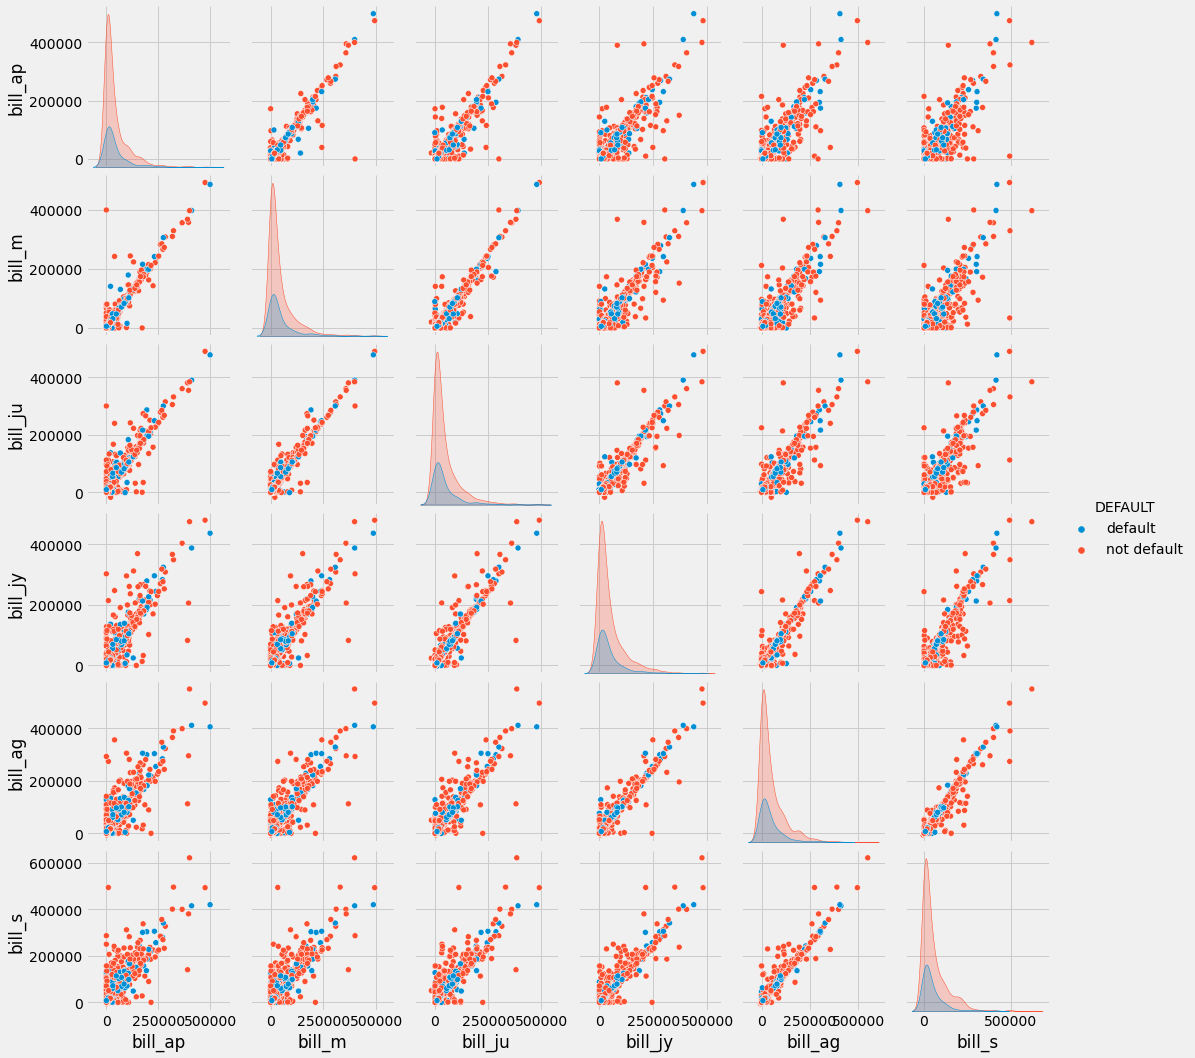

In [15]:
# name a sample of 1,000 data points selected from the df
smpl=df.sample(n=1000) 

#create pairwise plots of bill features using smpl
sns.pairplot(smpl, hue='DEFAULT', kind='scatter', vars=['bill_ap','bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s'])

#save plot as png
plt.savefig('creditone_bill_pairplot.png')

*Observations*
* It's reasonable to suspect the billing variables might be correlated, since it's not uncommon for individuals' spending to be similar from month to month.
* Yes, the billing variables are highly correlated with each other. Max: 0.8112, Min: 0.5853.
* In general, the correlation is highest between each monthly billing variable and the variable representing the month after. The correlation declines with each proceeding month (e.g. the correlation is highest between the April (bill_ap) and May (bill_m) billing variables, and declines for each subsequent month.)  
    * ◘ May impact model performance. Consider only using one of the billing variables in model. 

### Are the payment variables correlated with each other?

In [16]:
#look at kendall's tau correlations b/t payment variables
df[['pmt_ap', 'pmt_m', 'pmt_ju', 'pmt_jy', 'pmt_ag', 'pmt_s']].corr(method='kendall')

,pmt_ap,pmt_m,pmt_ju,pmt_jy,pmt_ag,pmt_s
pmt_ap,1.000000,0.449472,0.441167,0.398051,0.380381,0.348012
pmt_m,0.449472,1.000000,0.439032,0.424724,0.386574,0.360125
pmt_ju,0.441167,0.439032,1.000000,0.415577,0.407875,0.376197
pmt_jy,0.398051,0.424724,0.415577,1.000000,0.412677,0.405314
pmt_ag,0.380381,0.386574,0.407875,0.412677,1.000000,0.409167
pmt_s,0.348012,0.360125,0.376197,0.405314,0.409167,1.000000


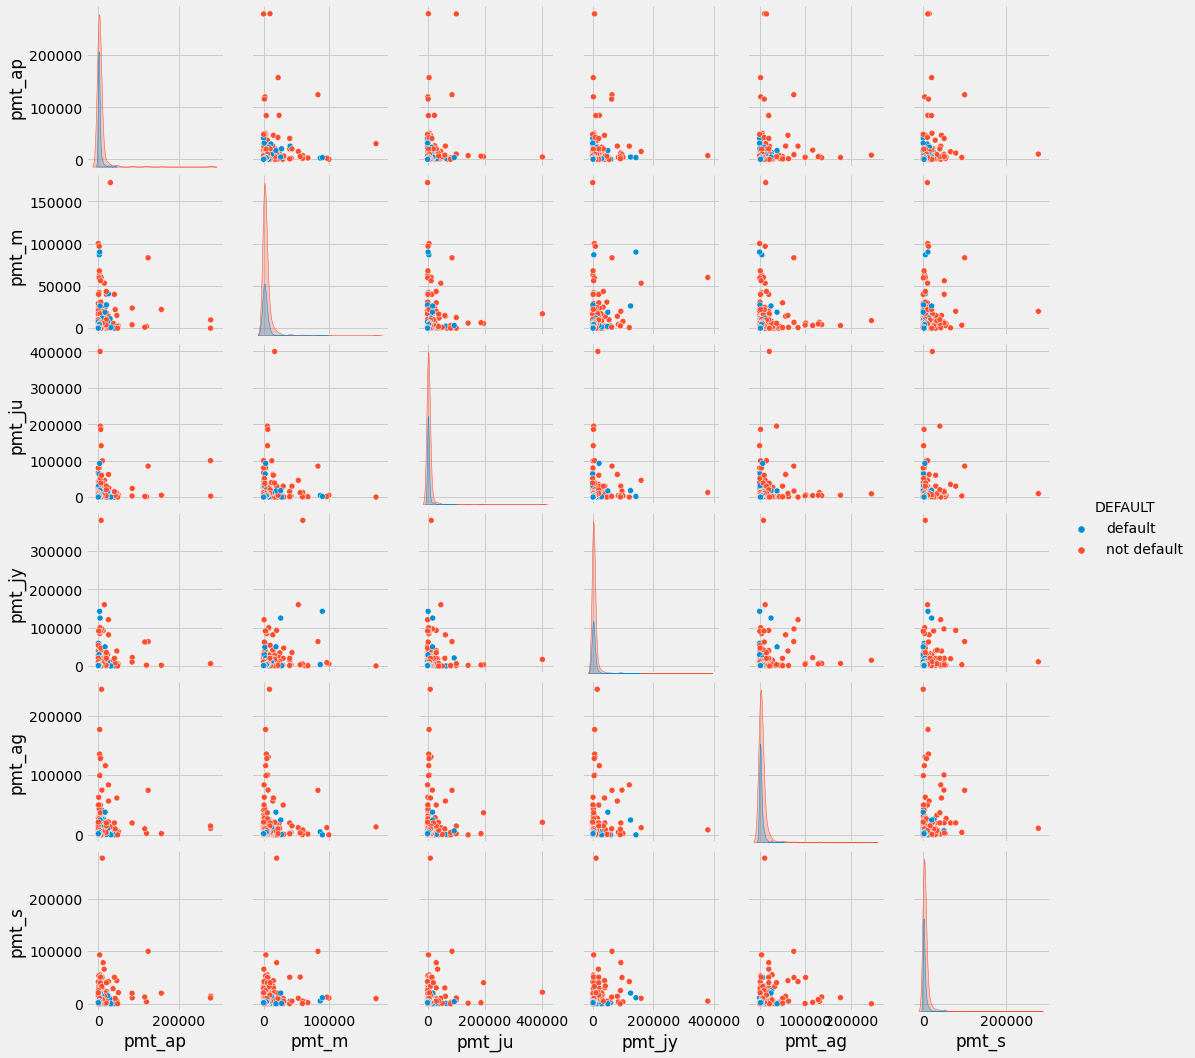

In [17]:
#create a pairplot of the payment features using smpl (of 1,000)
sns.pairplot(smpl, hue='DEFAULT', kind='scatter', vars=['pmt_ap','pmt_m', 'pmt_ju', 'pmt_jy', 'pmt_ag', 'pmt_s'])

#save plot as png
plt.savefig('creditone_pmt_pairplot.png')

*Observtions*
* I wanted to look at whether the payment variables on related because I thought the amount customers pay each month  might be related to the amount they were billed during the previous month. If that's true and the billing variables are highly correlated, I would expect the payment variables to also be highly correlated. 
* When we look at the kendall's correlation coefficients between the payment vars they are modest (between 0.348 and 0.4126).
* However, when we look at the scatter plots, there doesn't appear to be any obvious relationship. 
* This suggests, somewhat surprising, that the amount customers pay each month is not really related to the amount they are billed.
  * I wonder if the lack of a clear relationship is because I need to look at the relationships between billing vars and payment vars offset by one month (e.g. the relationship between the bill amount for April and the payment amount for May, and so on).

### Are the payment variables correlated with the billing variables?

In [18]:
#look at kendall's tau correlations b/t payment variables
df[['bill_ap', 'bill_m', 'bill_ju', 'bill_jy', 'bill_ag', 'bill_s','pmt_ap', 'pmt_m', 'pmt_ju', 'pmt_jy', 'pmt_ag', 'pmt_s']].corr(method='kendall')

,bill_ap,bill_m,bill_ju,bill_jy,bill_ag,bill_s,pmt_ap,pmt_m,pmt_ju,pmt_jy,pmt_ag,pmt_s
bill_ap,1.000000,0.804814,0.725219,0.666209,0.620644,0.585316,0.416516,0.533016,0.444745,0.398963,0.371385,0.344731
bill_m,0.804814,1.000000,0.797544,0.718643,0.662907,0.622603,0.395700,0.412857,0.513288,0.422650,0.395118,0.367000
bill_ju,0.725219,0.797544,1.000000,0.797878,0.721421,0.669466,0.368164,0.389042,0.394936,0.499917,0.430247,0.393563
bill_jy,0.666209,0.718643,0.797878,1.000000,0.805572,0.734915,0.346342,0.362800,0.373731,0.380428,0.508476,0.428333
bill_ag,0.620644,0.662907,0.721421,0.805572,1.000000,0.811290,0.321986,0.338027,0.348656,0.357478,0.388775,0.508433
bill_s,0.585316,0.622603,0.669466,0.734915,0.811290,1.000000,0.305821,0.317807,0.331639,0.333570,0.364161,0.393213
pmt_ap,0.416516,0.395700,0.368164,0.346342,0.321986,0.305821,1.000000,0.449472,0.441167,0.398051,0.380381,0.348012
pmt_m,0.533016,0.412857,0.389042,0.362800,0.338027,0.317807,0.449472,1.000000,0.439032,0.424724,0.386574,0.360125
pmt_ju,0.444745,0.513288,0.394936,0.373731,0.348656,0.331639,0.441167,0.439032,1.000000,0.415577,0.407875,0.376197
pmt_jy,0.398963,0.422650,0.499917,0.380428,0.357478,0.333570,0.398051,0.424724,0.415577,1.000000,0.412677,0.405314


*Observations*
* I expected to find a moderate to high correlation between the billing and payment variables, since presumably the amount customers pay each month is at least somewhat related to how much they are billed. 
* More specifically, we should expect that the payment amount is most highly correlated with the bill amount of the previous month (e.g. the july payment amount is has the strongest correlation with the bill amount for June.
* The strongest correlations are around 0.51.

### Are the repayment variables related to the billing or payment variables?

The values in the repayment history variables should, in some sense, be related the values in the payment variables because the the repayment history variable is representing whether the customer has been using the credit, if they are paying their bills, and if their payments are for the full amount or leave a monthly balance (revolving credit).
* However, it's not clear how or what kind of relationship I can look for. One challenge is that the payment variables are continuous, and the repayment variables are categorical. It shouldf be the case that if a customer's monthly payment is not zero (i.e. they paid some amount) for some month, the value for their repayment history variable the next month should be -1 or zero.
* I have no idea how I could test for that. 

## Investigate Relationships Between Features (IVs) & Targets (DVs)

### Credit Limit Target

In this section I will perform statistical tests to determine whether any of the DVs are related to the limit_bal target variable. 

#### Demographic Variables & Credit Limit

In [19]:
# sns.heatmap(data=df, annot=True, fmt="d", linewidths=.5)

"""
Above code won't work with non-numeric data
"""

"\nAbove code won't work with non-numeric data\n"

##### Sex & Credit Limit

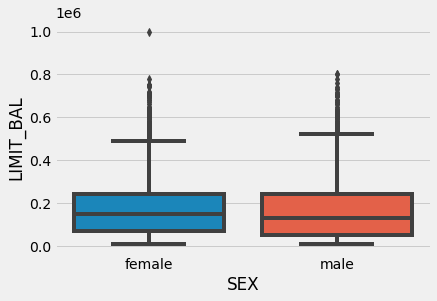

In [20]:
sns.boxplot(data=df, x='SEX',y='LIMIT_BAL' )

# save plot as png
plt.savefig("creditone_sex_credit_box.png")

The similarity between the box plots for female and male indicates there is no difference in credit limits between men and women. That means SEX is unlikely to be a helpful variable to include in a model prediting LIMIT_BAL.

##### Education & Credit Limit

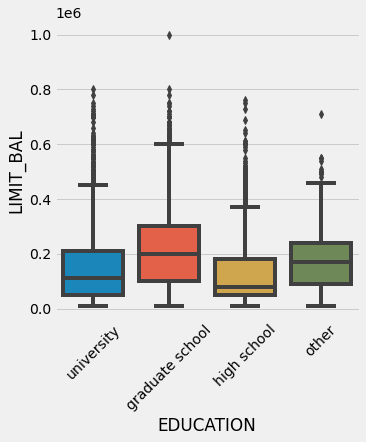

In [21]:
sns.catplot(data=df, kind='box', x='EDUCATION', y='LIMIT_BAL').set_xticklabels(rotation=45)

# save plot as png
plt.savefig("creditone_edu_credit_box.png")

The box plots for all education levels are very similar. Customers with a graduate education enjoy credit limits that are on average higher than the other groups. It also appears the credit limits for customers with a high school education are slightly skewed to the lower end. The differences aren't dramatic, but a customer's credit limit does appear to be somewhat related to their level of education  

##### Marriage & Credit Limit

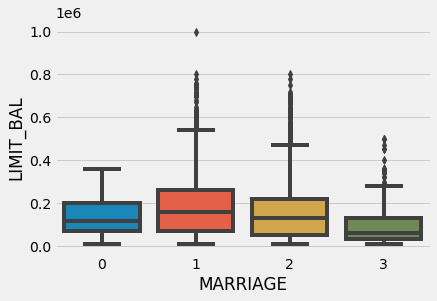

In [22]:
sns.boxplot(data=df, x='MARRIAGE', y='LIMIT_BAL')

# save plot as png
plt.savefig("creditone_marriage_credit_box.png")

Although there are some small differences in the plots, it does not appear that a customer's credit limit is related to their marital status. 

##### Age & Credit Limit

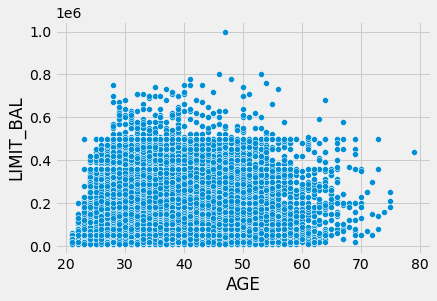

In [23]:
sns.scatterplot(data=df, x='AGE', y='LIMIT_BAL')

# save plot as png
plt.savefig("creditone_age_credit_box.png")

There doesn't appear to be any sort of meaningful relationship between age and credit limit.

### Default Target

In [27]:
#obtain correlation co-efficients for all features and target
df[df.columns[1:]].corr()['DEFAULT'][:]

KeyError: 'DEFAULT'

#### Demographic Features & Defualt Target

##### Sex & Default

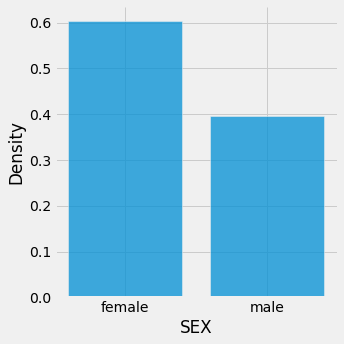

In [25]:
sns.displot(data=df, x="SEX", stat='density', shrink=.8)

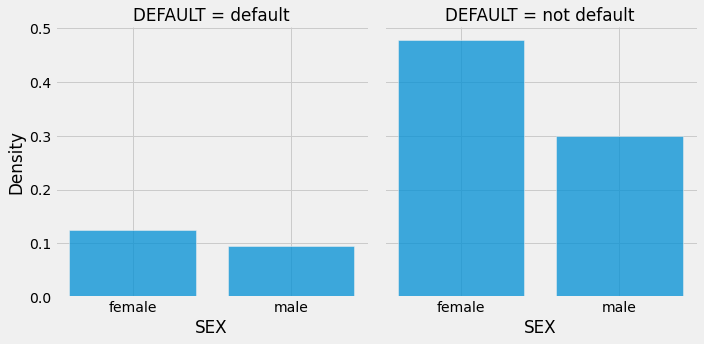

In [28]:
sns.displot(data=df, x="SEX", col='DEFAULT', stat='density', shrink=.8)

#save plot as png
plt.savefig('creditone_sex_default_notdefault.png')

*Observations*
* From the first plot, we can see that CreditOne's customers are slightly more likely to be female than male.
* From the second set of plots, when we compare the data for customers who have defualted on their loans to the data for the customers who have not defaulted on their loans, it looks like customers who have defaulted on their loans are slightly more likely to be male than customers overall--however, it's unlikely this difference is statistically significant. 
* The fact that the relative probabilities of being female vs. male is almost the same among the customers who have defaulted and the customers who have not defualted suggests that sex will not be an important feature in a model predicting whether a customer will defualt on their loans.

##### Education & Default

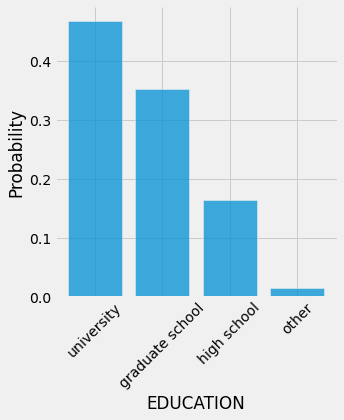

In [29]:
#create probability chart for the EDU var 
sns.displot(data=df, x ="EDUCATION", discrete=True, shrink = .8, stat='probability').set_xticklabels(rotation=45) 

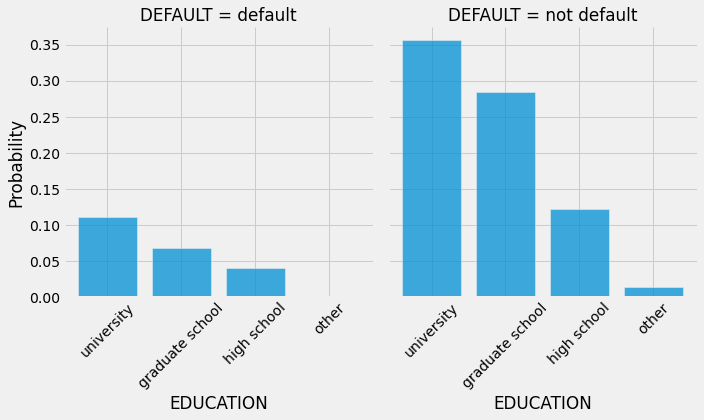

In [30]:
#create subplots showing the distribution for the EDU var conditional on the DEFUALT var
sns.displot(data=df, x ="EDUCATION", col = 'DEFAULT', shrink = .8, stat='probability').set_xticklabels(rotation=45)

*Observations*
* Since higher levels of education are highly correlated with higher levels of income, and higher levels of income are presumably correlated with lower rates of defaulting on loans. I was anticipating that customers with university and graduate school levels of education to be relatively less likely to default on their loans. 
* However, comparing the distributions of education levels for customers who have defaulted to the ebb

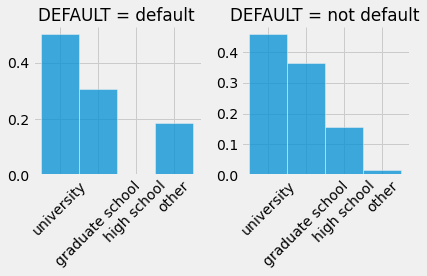

In [31]:
# this code generates a messed up plot
g = sns.FacetGrid(data=df, col="DEFAULT", sharey=False)
g.map_dataframe(sns.histplot, x="EDUCATION", stat='probability')
g.set_xticklabels(rotation=45) 

>*Coding Notes*
>* I created the g subpolots at fisrt and thought they revealed an interesting relationship between level of edu and whether a customer had defaulted on their loans. It looked like relative to other groups, those with a high school edu level are less likely to default on their loans, and those with the other edu level are more likely. 
>* However, I continued to mess around and try out different types of plots and use different code, and none of the subsequent plots I generated showed the pattern. They all showed the pattern we would expect to see if there is no significant relationship between level of education and whether a customer defaulted on their loan.
>* I investigated the issue extensively on my own and tried to figure it out with David Schwab, but it is still a mystery. 
  >* David pointed out that in the weird charts it looks like bars for the "high school" and "other" levels the bars have been swapped. That sounds plausible to me, but we could not figure out how that could have happened, or how to get rid of it.  

##### Age & Default

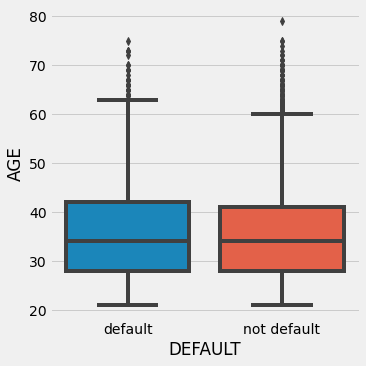

In [33]:
sns.catplot(data=df, kind='box', x='DEFAULT', y='AGE')

#save plot as png
plt.savefig('creditone_age_default.png')

*Observations*
* We can see in the above boxplot the the mean, IQR (middle 50% of data points), and range for the age variable are nearly identical for customers who defaulted on their loans (blue box) and for customers who did not defualt on their loans (orange box). 
* This suggests there is no significant relationship between a customer's age and whether or not she defaulted on her loans, which means AGE will not be an important feature in a model predicting whether a customer will default.  

##### Marriage & Default

In [34]:
#filter the df to return only rows where value for DEFAULT == default
dflt = df.loc[df['DEFAULT']=='default']
dflt.head()

,ID,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_ap,bill_m,bill_ju,bill_jy,...,pmt_jy,pmt_ag,pmt_s,pay_ap,pay_m,pay_ju,pay_jy,pay_ag,pay_s,DEFAULT
0,1,female,university,1,24,20000,0,0,0,689,...,0,689,0,-2,-2,-1,-1,2,2,default
1,2,female,university,2,26,120000,3261,3455,3272,2682,...,1000,1000,0,2,0,0,0,2,-1,default
13,14,male,university,2,30,70000,36894,36137,66782,65701,...,3000,0,3200,2,0,0,2,2,1,default
16,17,male,graduate school,2,24,20000,19104,17905,18338,17428,...,1500,0,3200,2,2,2,2,0,0,default
21,22,female,university,1,39,120000,316,632,0,316,...,0,316,316,-1,-1,-1,-1,-1,-1,default


In [35]:
#filter the df to return only rows where value for DEFAULT == not default
nodflt = df.loc[df['DEFAULT']=='not default']
nodflt.head()

,ID,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_ap,bill_m,bill_ju,bill_jy,...,pmt_jy,pmt_ag,pmt_s,pay_ap,pay_m,pay_ju,pay_jy,pay_ag,pay_s,DEFAULT
2,3,female,university,2,34,90000,15549,14948,14331,13559,...,1000,1500,1518,0,0,0,0,0,0,not default
3,4,female,university,1,37,50000,29547,28959,28314,49291,...,1200,2019,2000,0,0,0,0,0,0,not default
4,5,male,university,1,57,50000,19131,19146,20940,35835,...,10000,36681,2000,0,0,0,-1,0,-1,not default
5,6,male,graduate school,2,37,50000,20024,19619,19394,57608,...,657,1815,2500,0,0,0,0,0,0,not default
6,7,male,graduate school,2,29,500000,473944,483003,542653,445007,...,38000,40000,55000,0,0,0,0,0,0,not default


Text(0.5, 0, '')

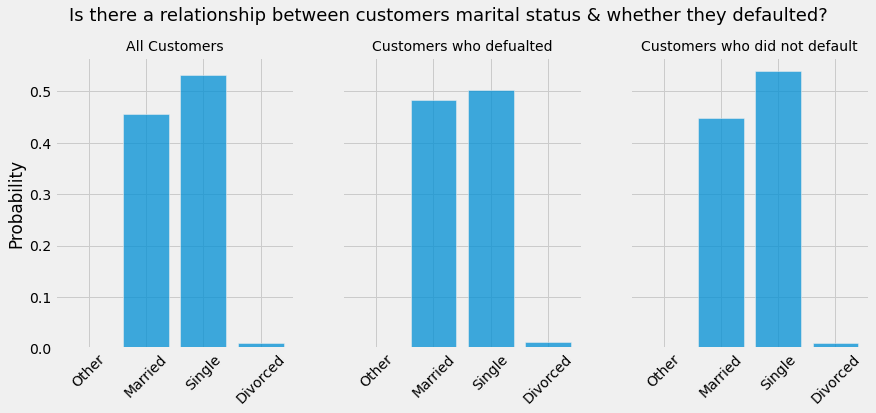

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(13,5), sharey=True)
axes[0].set_title('All Customers', fontsize=14)
axes[1].set_title('Customers who defualted', fontsize=14)
axes[2].set_title('Customers who did not default', fontsize=14)

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # set xticks...
    ax.set(xticks=[0, 1, 2, 3])

fig.suptitle(t='Is there a relationship between customers marital status & whether they defaulted?', verticalalignment='baseline', fontsize=18)
labels=['Other', 'Married', 'Single', 'Divorced']


sns.histplot(ax=axes[0], data=df, x ='MARRIAGE', stat='probability', discrete=True, shrink=.8)
axes[0].set_xlabel('')
axes[0].set_xticklabels(labels=labels, rotation=45)

sns.histplot(ax=axes[1], data=dflt, x ='MARRIAGE', stat='probability', discrete=True, shrink=.8)
axes[1].set_xlabel('')
axes[1].set_xticklabels(labels=labels, rotation=45)

sns.histplot(ax=axes[2], data=nodflt, x ='MARRIAGE', stat='probability', discrete=True, shrink=.8)
axes[2].set_xticklabels(labels=labels, rotation=45)
axes[2].set_xlabel('')

>*Coding Notes*
>* It look several hours to get the above row of plots. 
>* Problems I had to solve:
  * Because the number of defualts is much smaller than not defaults, to compare sex across the two categories I couldn't use count as the y axis, I needed to plot a normalized stat like probability or density. 
  * Using hue: When I tried to use hue to represent the DEFAULT categories and plot them on one set of axes, the resulting graph had 4 bars (2 for female, 2 male) whose probabilities summed to 1. Which meant the bars for male an female in the default category were much smaller than the bars for male and female in the not default category. 
  * I also couldn
  

*Observations*
* From a comparison on the above plots, there appears that single customers are relatively less likely to default on their loans. 

#### Billing Variables & Default

<AxesSubplot:xlabel='DEFAULT', ylabel='bill_s'>

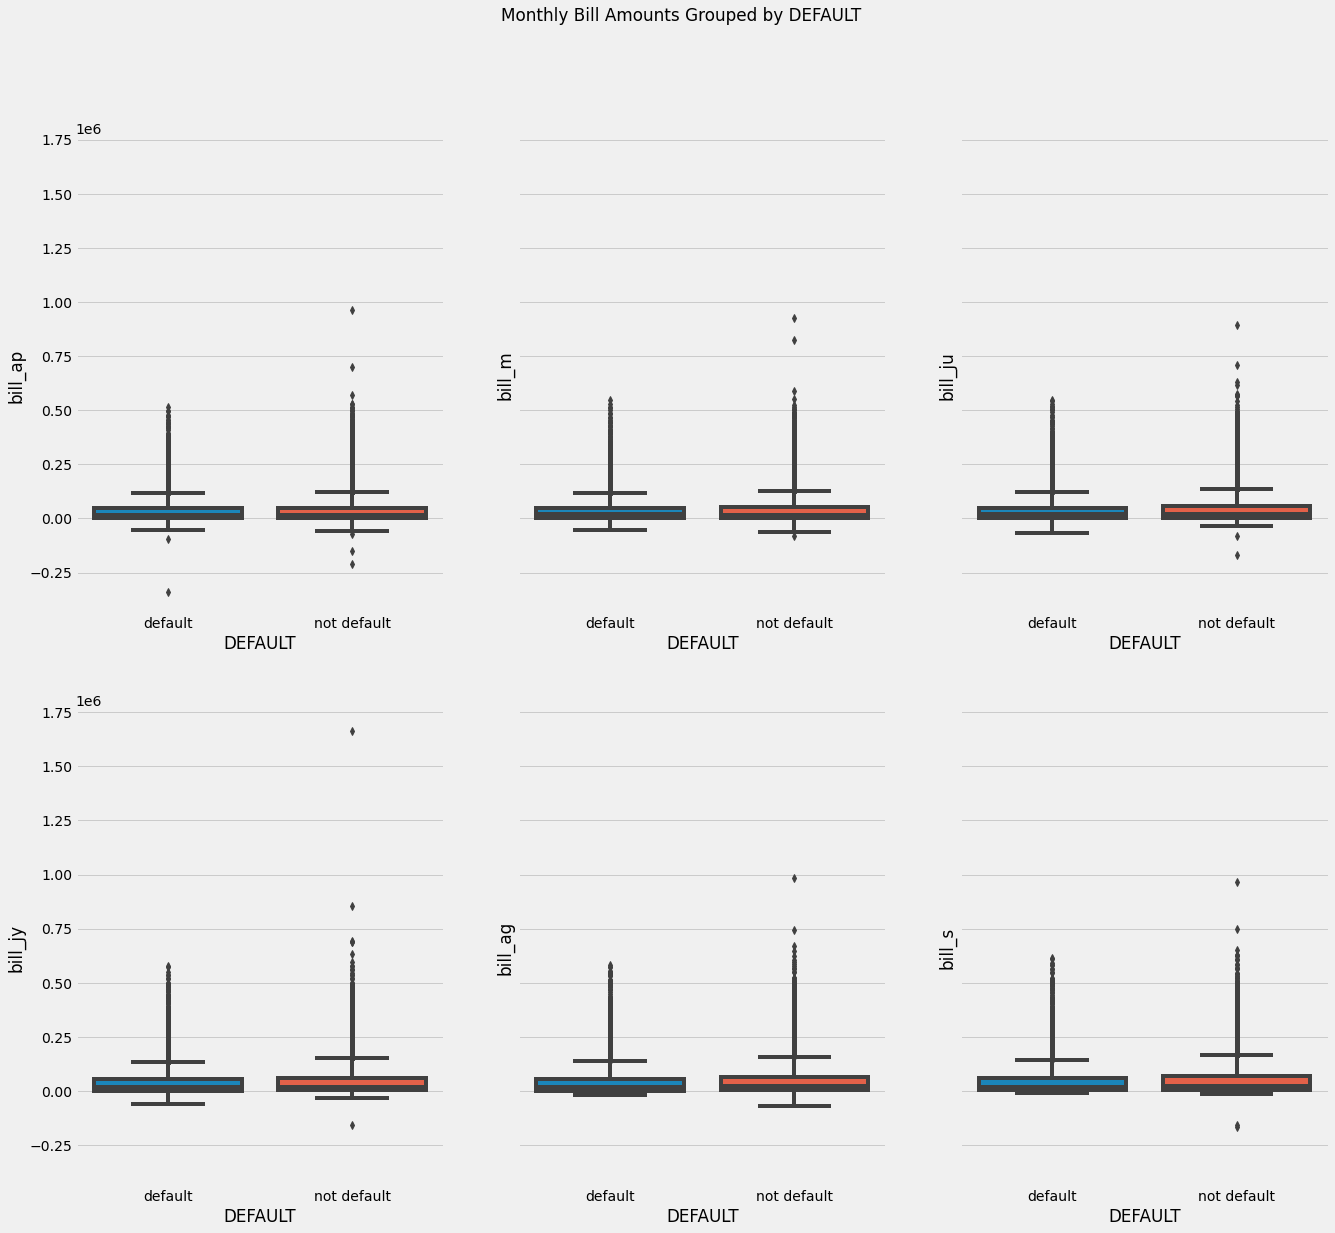

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(20,18), sharey=True)

fig.suptitle('Monthly Bill Amounts Grouped by DEFAULT')

sns.boxplot(ax=axes[0, 0], data=df, x='DEFAULT', y='bill_ap')
sns.boxplot(ax=axes[0, 1], data=df, x='DEFAULT', y='bill_m')
sns.boxplot(ax=axes[0, 2], data=df, x='DEFAULT', y='bill_ju')
sns.boxplot(ax=axes[1, 0], data=df, x='DEFAULT', y='bill_jy')
sns.boxplot(ax=axes[1, 1], data=df, x='DEFAULT', y='bill_ag')
sns.boxplot(ax=axes[1, 2], data=df, x='DEFAULT', y='bill_s')


>*Coding Notes*
* Before finding the code to create the above 2x6 grid of subplots, I created the boxplots for each billing variable separately. For future refernce here is the code I used:  
  * ```sns.catplot(data=df, kind='box', x='DEFAULT', y='bill_ap')```
  * ```sns.catplot(data=df, kind='box', x='DEFAULT', y='bill_m', height=6)```
  * ```sns.catplot(data=df, kind='box', x='DEFAULT', y='bill_ju', height=6, aspect=.5)```
  * ```sns.catplot(data=df, kind='box', x='DEFAULT', y='bill_ag', height=8, aspect=.5)```
  * ```sns.catplot(data=df, kind='box', x='DEFAULT', y='bill_s', height=8, aspect=.5)```

*Observations*
* I have more questions than observations.
  * It looks like there are some significant outliers. How can we find those data points in our df.
  * Other than some differences in outliers and a noticable difference in the length of the wiskers in bill_ag, all the box plots are basically the same. What, if anything, can we conclude from that? 

#### Payment Variables & Default

<AxesSubplot:xlabel='DEFAULT', ylabel='pmt_s'>

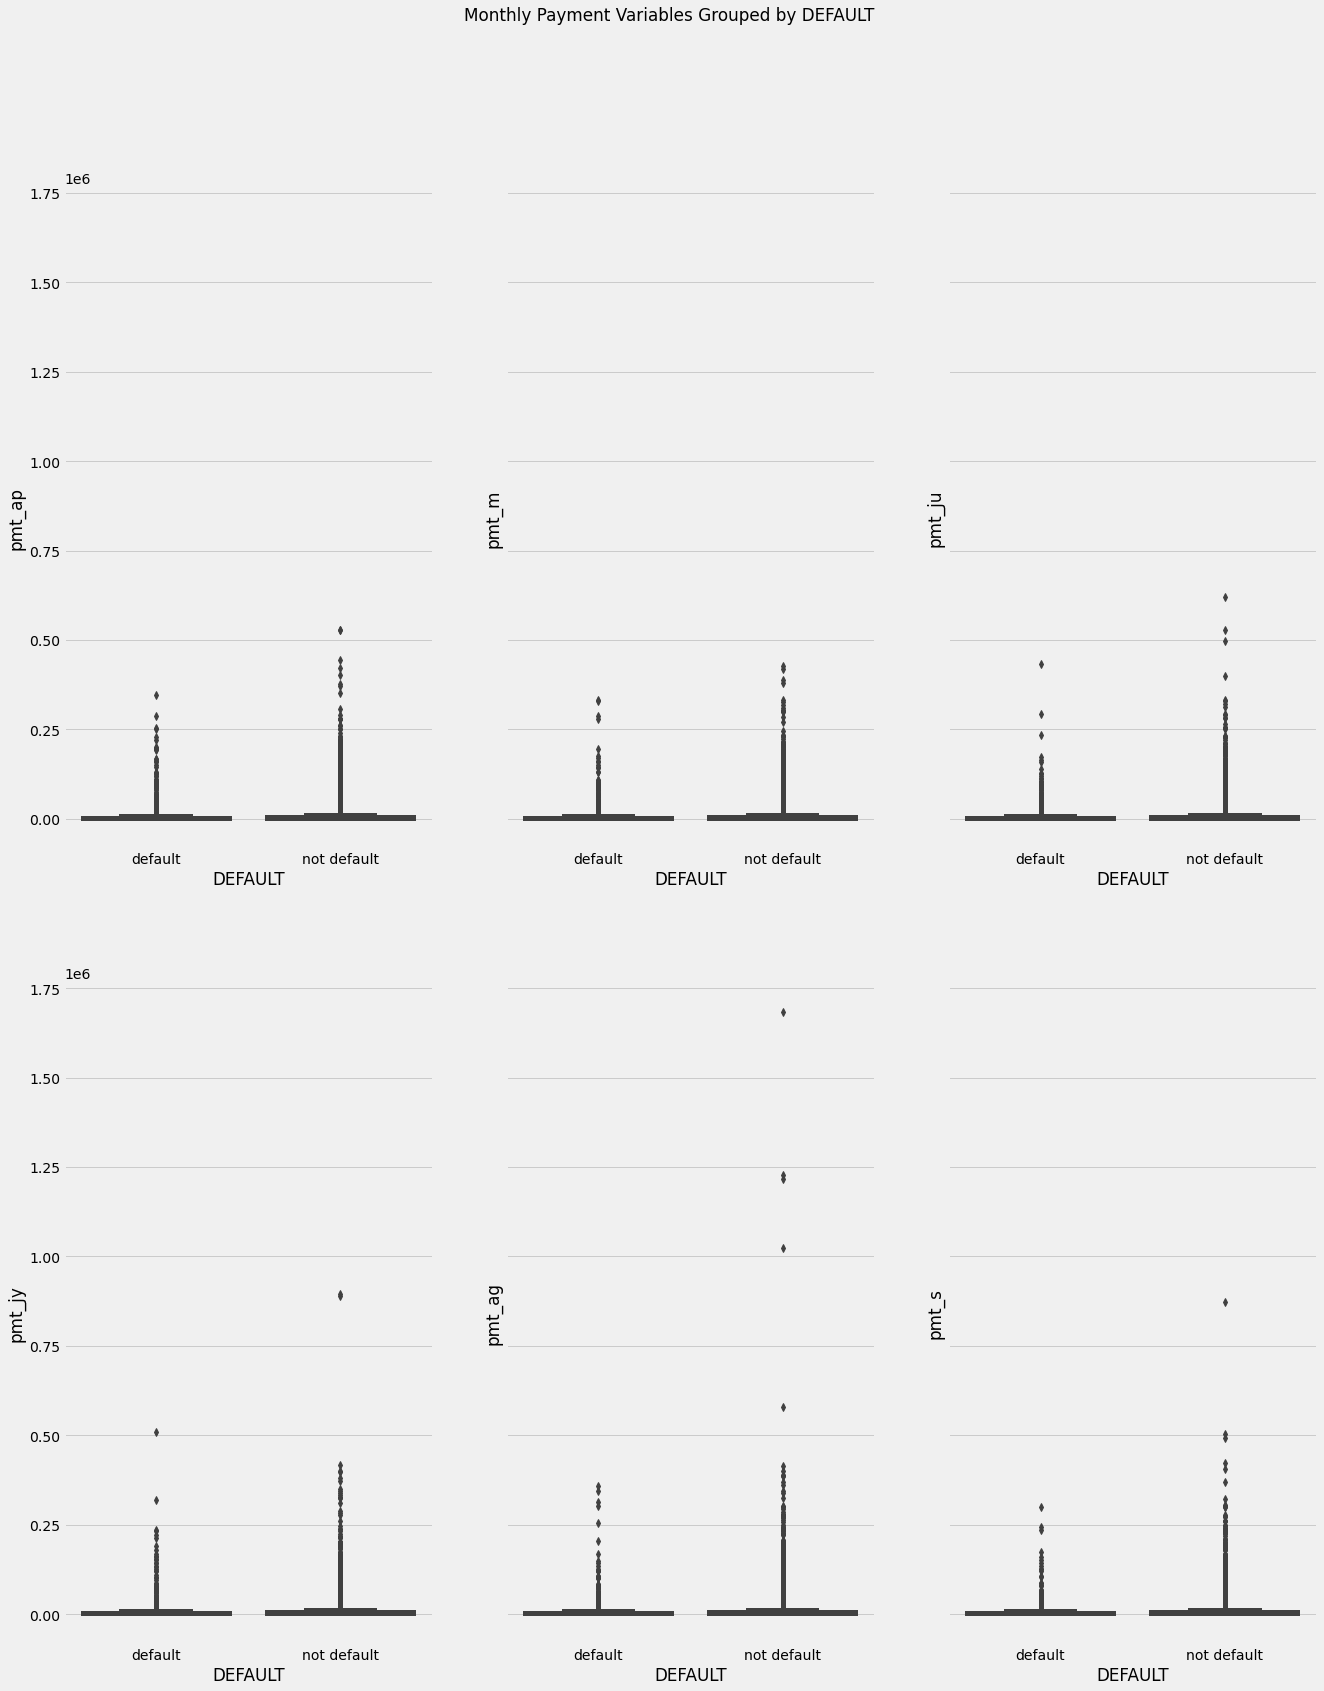

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20,25), sharey=True)

fig.suptitle('Monthly Payment Variables Grouped by DEFAULT')

sns.boxplot(ax=axes[0, 0], data=df, x='DEFAULT', y='pmt_ap')
sns.boxplot(ax=axes[0, 1], data=df, x='DEFAULT', y='pmt_m')
sns.boxplot(ax=axes[0, 2], data=df, x='DEFAULT', y='pmt_ju')
sns.boxplot(ax=axes[1, 0], data=df, x='DEFAULT', y='pmt_jy')
sns.boxplot(ax=axes[1, 1], data=df, x='DEFAULT', y='pmt_ag')
sns.boxplot(ax=axes[1, 2], data=df, x='DEFAULT', y='pmt_s')


*Observations*
* I assume the boxplots for the payment variables look like this because there is a high % of zeros in these variables. 
* I also seem some signigicant outliers. 


* Questions:
  * I don't have a good sense of how to interpret/understand what I'm seeing when I compare visualizations of DVs conditional on a target variable. Am I just looking for significant differences? What conclusions would you draw from seeing the above plots for the payment variables? Are there any rules of thumb?
  * How do you go about figuring out whether it would improve the situation to bin the values, remove outliers, aggregate the variables, etc? There are too many possibilities to test them all. How do you narrow things down? Is there a way to determine which changes are most likely to have an impact so you can focus your efforts? 

# Transform Non-numeric Values

In [ ]:
# select columns with non-numeric data and create a new df with only those columns (so changes aren't in original df)
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

In [ ]:
# change data types from object to category to make transforminmg faster
cat_df = obj_df[['SEX', 'EDUCATION', 'DEFAULT']].astype('category')

"""
I read that it's more efficient to transform non-numerical data into numerical data
if the vars to be transformed have the 'category data type instead of 'object' dtype
To find out how long things take to run use the %timeit magic
"""
cat_df.dtypes

In [ ]:
#import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

#instiate the label encoder function, call it le
le = LabelEncoder()

In [ ]:
# use label encoder to  encode values in SEX column as numbers and add new column to df to preserve encoded values 
cat_df['sex_le']=le.fit_transform(cat_df['SEX'])

cat_df.head()

In [ ]:
# use label encoder to  encode values in SEX column as numbers and add new column to df to preserve encoded values
cat_df['dflt_le']=le.fit_transform(cat_df['DEFAULT'])

cat_df.head()

In [ ]:
pd.get_dummies(cat_df, columns=['EDUCATION'], prefix=['edu'])

cat_df.head()

>*Coding Notes*
>* The first time I executed the ```get_dummies``` code it didn't do anything. 
>* I had to add ```cat_df=``` before ```pd.get_dummies``` for the dummy variables to show up in the df.
>* I asked why I needed the ```cat_df=``` before get_dummies by not other things (e.g. df.head)? Mike said the reason is that without the assignment (```cat_df=```) at the beginning of the line, pandas doesn't assign the output of the get_dummies operation to anything, and so it isn't preserved. To put it differently, putting ```cat_df=``` at the front of the line does to same thing as adding an ```inplace=True``` parameter would do (Except the get_dummies function doesn't accept an ```inplace=``` parameter). (from Slack exchange on 1/4/2020)

In [ ]:
cat_df=pd.get_dummies(cat_df, columns=['EDUCATION'], prefix=['edu'])

cat_df.head()

## Perform Transformations on Original df
To avoid issues arising from having to merge 2 df, I am going to create a copy of the original df and transform the original non-numerical variables, instead of adding new variables to the df.

In [ ]:
#create a copy of the dataframe to retain transformations
num_df= df.copy()

In [ ]:
# use label encoder to change values in SEX into numbers
num_df['SEX']=le.fit_transform(num_df['SEX'])

num_df.head()

In [ ]:
# use label encoder to change values in DEFUALT into numbers
num_df['DEFAULT']=le.fit_transform(num_df['DEFAULT'])

In [ ]:
#use get.dummies function to transform EDU var into 4 dummy vars (1 var for each category)
num_df=pd.get_dummies(num_df, columns=['EDUCATION'], prefix=['edu'])

num_df.head()

In [ ]:
#use get.dummies function to transform MAR var into 4 dummy vars (1 var for each category)
num_df=pd.get_dummies(num_df, columns=['MARRIAGE'], prefix=['mar'])
"""
The values in the MARRIAGE var were numerical to start. I had to transform it into 4 dummy variables 
because I am going to use this data to train and test a regression ML model, and categorical vars are
treated as ordinal (i.e. the algo would treat/interpret category labeled 2 as the average of categories labeled 1 & 3)
"""

In [ ]:
num_df.head()

## Export Numerical df

In [ ]:
num_df.to_csv (r'C:\Users\kpiat\Data Science Stuff\Course 2-Data Program\num_only_credit_one_data.csv', index = False, header=True)

# Additional Stuff


In [ ]:
#convert DEFUALT into numerical feature
df['DEFAULT'] =df['DEFAULT'].astype('category').cat.codes
"""
I read that it is less memory intensive to convert non-numerical variables into numerical vars if the vars are 
have the category data type instead of the obj dtype.
"""

In [ ]:
#obtain correlation co-efficients for all features and bill_ap
df[df.columns[1:]].corr()['bill_ap'][:]

In [ ]:
#filter df to exclude cases where bill_ap value is 0, then print last 20 cases in df
df.loc[df.bill_ap !=0].tail(20)

In [ ]:
#filter the df to return only the rows where the april bill var is not 0
nzbill=df.loc[df['bill_ap'] !=0]

In [ ]:
# filter the data to return only rows where june bill var is greater than 0
nzbill2=df['bill_ju'].loc[lambda x: x > 0]

nzbill2.head(20)

In [ ]:
#filter data to return only rows where the april AND june bill vars are not zero
nzbill3=df.query('bill_ap !=0 & bill_ju !=0')
nzbill3.shape

>*Coding Notes*
>* You can filter data using the ```df.query()``` function with string statements composed of var names and boolean operators.
>* The first time I ran ```nzbill3.shape()``` it didn't work because I ended it with (). ```.shape``` is not a function that you want to perform on the data. It's more like asking for some kind of description of the data. That's why it shouldn't have parentheses at the end.

In [ ]:
#get the corr between the filtered data and DEFAULT
nzbill3[nzbill3.columns[1:]].corr()['DEFAULT'][:]

>*Notes*
>* Because I am concerned that the high percentage of 0 values in the billing variables is negatively impacting the analysis, I wanted to see if the correlations with DEFAULT would improve if I excluded the data where one or more of the billing vars has a value of 0. 
>* However, it occured to me after getting the above .corr and thinking about the math behind correlation that excluding the cases with 0 values wouldn't impact the co-efficients.

In [ ]:
#filter the data to return only rows where the April bill var is less than 100,000
df.loc[df['bill_ap']<= -100000]

In [ ]:
nzbill3.shape